### Importar libreríras

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Cargar datos

In [3]:
# Cargar la base de datos
data = pd.read_csv("C:/Users/juanj/OneDrive/Documentos/FONAG/Optimizacion/SalveFacchaDique5m.csv")

Chlorofila_A = data.iloc[:,8].dropna()
Temperatura = data.iloc[:,11].dropna()
Nutrientes = data.iloc[:,21].dropna()
Radiacion = data.iloc[:,20].dropna()

### Funciones

In [4]:
# Funciones definidas previamente
def growth_temperature(temp, temp_opt=15, sigma=2):
    """Efecto de la temperatura sobre la producción de clorofila-a usando una función gaussiana."""
    return np.exp(-((temp - temp_opt) ** 2) / (2 * sigma ** 2))

def nutrient_limitation(np_ratio, k_np=86.6):
    """Efecto de la relación N/P sobre la producción de clorofila-a."""
    return np_ratio / (k_np + np_ratio)

def light_limitation(radiation, max_radiation=80):
    """Efecto de la radiación (W/m²) sobre la producción de clorofila-a.
       Crece linealmente desde 0 hasta 1 a los 80 W/m² y luego se mantiene en 1.
    """
    if radiation < max_radiation:
        return radiation / max_radiation
    else:
        return 1

def chlorophyll_a_production(temp, radiation, np_ratio, max_chlorophyll=40):
    """Modelo de producción de clorofila-a considerando temperatura, radiación y relación N/P."""
    temp_effect = growth_temperature(temp)
    light_effect = light_limitation(radiation)
    nutrient_effect = nutrient_limitation(np_ratio)
    return max_chlorophyll * min(temp_effect, light_effect, nutrient_effect)

In [14]:
# Parámetros para las gráficas
temperatures = np.linspace(Temperatura.min(), Temperatura.max(), 100)
radiation_levels = np.linspace(Radiacion.min(), Radiacion.max(), 100)
np_ratios = np.linspace(Nutrientes.min(), Nutrientes.max(), 100)
temp_fixed = Temperatura.mean()
nutr_fixed = Nutrientes.mean()
radiation_fixed = Radiacion.mean()

### Temperatura

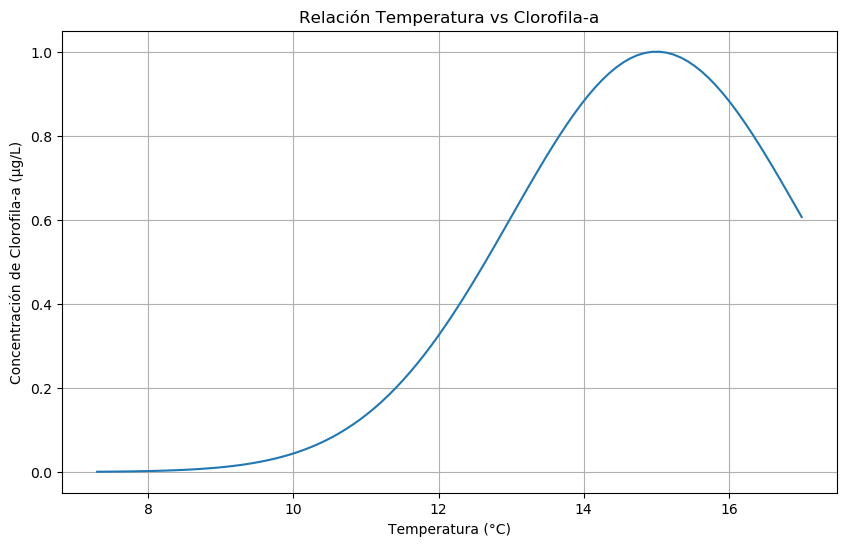

In [15]:
# Gráfico de temperatura vs clorofila
temp_ChloA = [growth_temperature(temp) for temp in temperatures]
plt.figure(figsize=(10, 6))
plt.plot(temperatures, temp_ChloA, label='Temperatura vs Clorofila-a')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Concentración de Clorofila-a (µg/L)')
plt.title('Relación Temperatura vs Clorofila-a')
plt.grid(True)
plt.show()

### Nutrientes

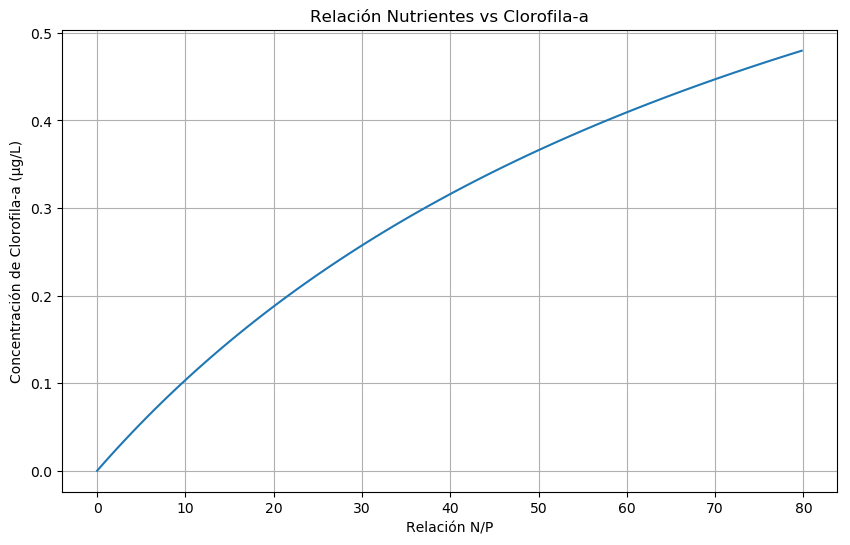

In [16]:
# Gráfico de nutrientes vs clorofila
nutrient_ChloA = [nutrient_limitation(np_ratio) for np_ratio in np_ratios]
plt.figure(figsize=(10, 6))
plt.plot(np_ratios, nutrient_ChloA, label='Nutrientes vs Clorofila-a')
plt.xlabel('Relación N/P')
plt.ylabel('Concentración de Clorofila-a (µg/L)')
plt.title('Relación Nutrientes vs Clorofila-a')
plt.grid(True)
plt.show()

### Radiación

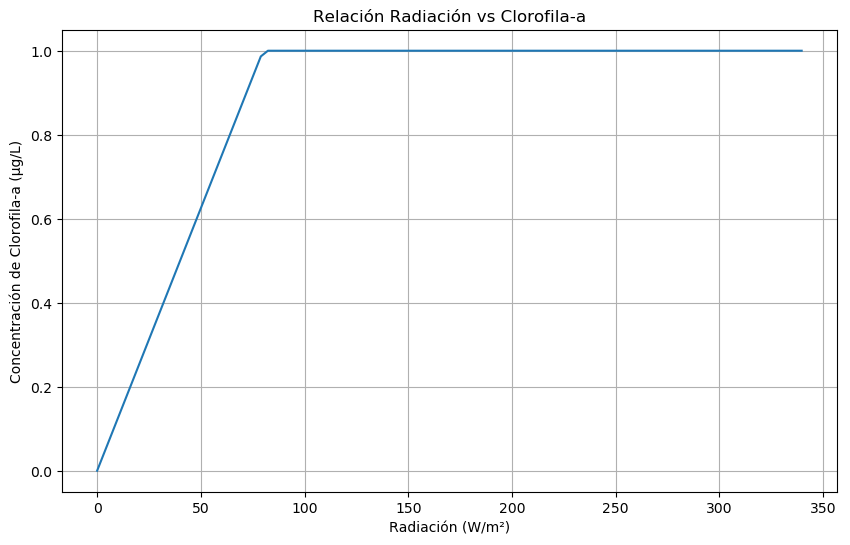

In [17]:
# Gráfico de radiación vs clorofila
light_ChloA = [light_limitation(radiation) for radiation in radiation_levels]
plt.figure(figsize=(10, 6))
plt.plot(radiation_levels, light_ChloA, label='Radiación vs Clorofila-a')
plt.xlabel('Radiación (W/m²)')
plt.ylabel('Concentración de Clorofila-a (µg/L)')
plt.title('Relación Radiación vs Clorofila-a')
plt.grid(True)
plt.show()

# Gráfica de relación de las 3 variables

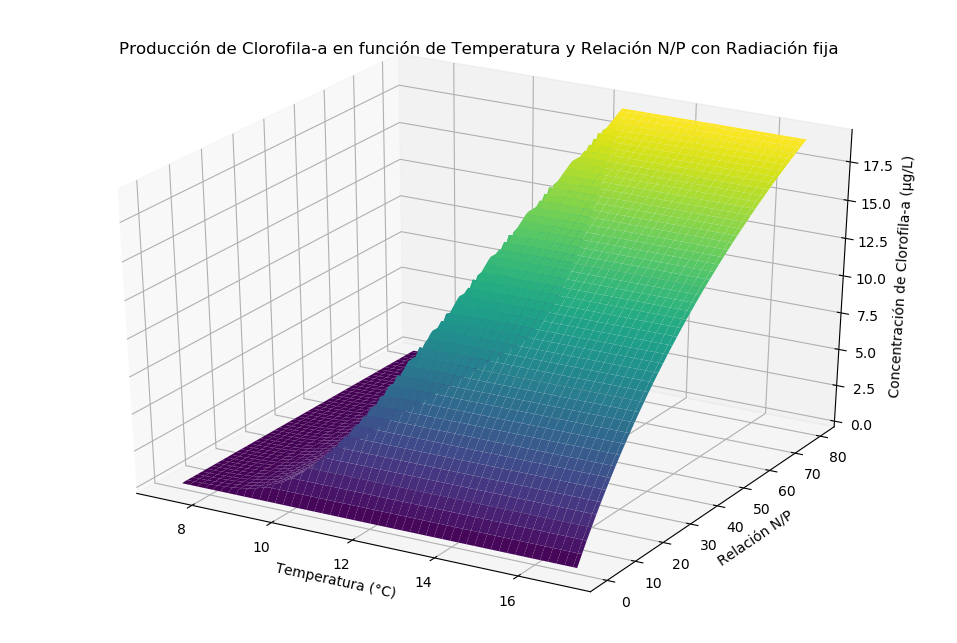

In [18]:
 # Gráfico rediación fija
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(temperatures, np_ratios)
Z = np.array([[chlorophyll_a_production(temp, radiation_fixed, np_ratio) for temp in temperatures] for np_ratio in np_ratios])

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Temperatura (°C)')
ax.set_ylabel('Relación N/P')
ax.set_zlabel('Concentración de Clorofila-a (µg/L)')
ax.set_title('Producción de Clorofila-a en función de Temperatura y Relación N/P con Radiación fija')
plt.show()

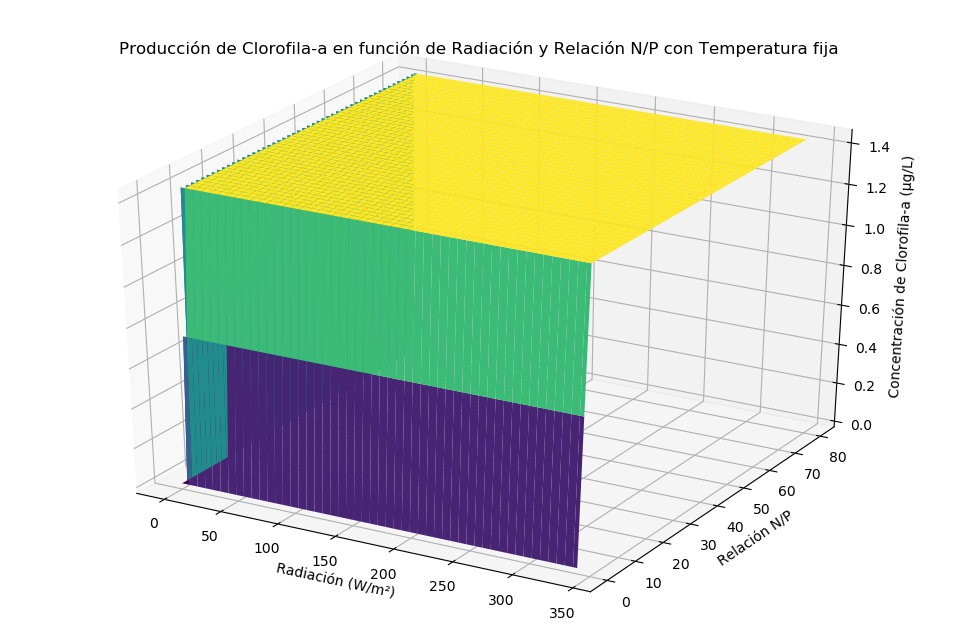

In [19]:
# Gráfico 3D con temperatura fija
fig_temp = plt.figure(figsize=(12, 8))
ax_temp = fig_temp.add_subplot(111, projection='3d')
X, Y = np.meshgrid(radiation_levels, np_ratios)  # Radiación y Relación N/P
Z = np.array([[chlorophyll_a_production(temp_fixed, radiation, np_ratio) for radiation in radiation_levels] for np_ratio in np_ratios])

ax_temp.plot_surface(X, Y, Z, cmap='viridis')
ax_temp.set_xlabel('Radiación (W/m²)')
ax_temp.set_ylabel('Relación N/P')
ax_temp.set_zlabel('Concentración de Clorofila-a (µg/L)')
ax_temp.set_title('Producción de Clorofila-a en función de Radiación y Relación N/P con Temperatura fija')
plt.show()

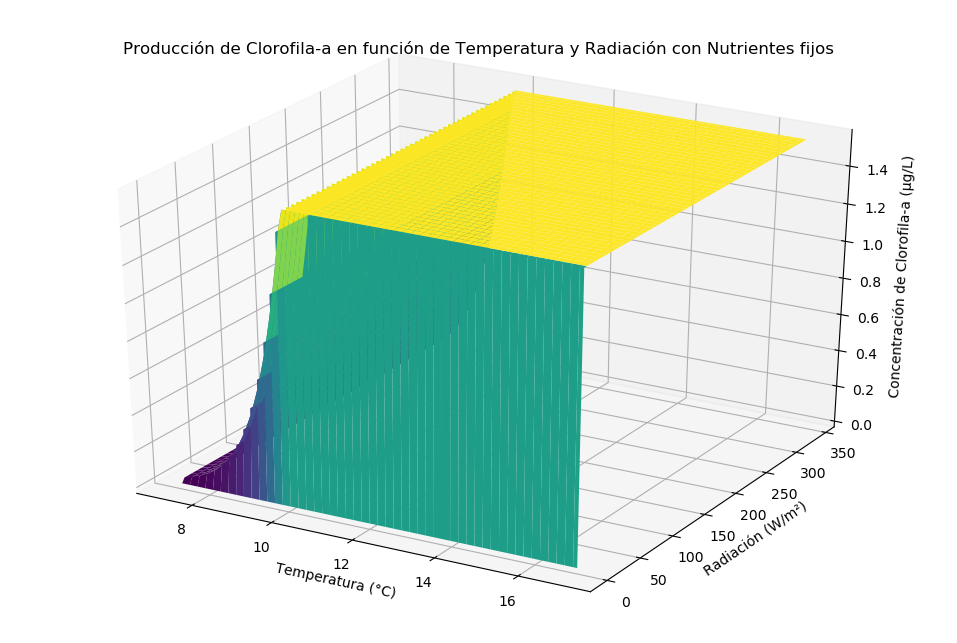

In [21]:
# Gráfico 3D con nutrientes fijos
fig_nutr = plt.figure(figsize=(12, 8))
ax_nutr = fig_nutr.add_subplot(111, projection='3d')
X, Y = np.meshgrid(temperatures, radiation_levels)  # Temperatura y Radiación
Z = np.array([[chlorophyll_a_production(temp, radiation, nutr_fixed) for temp in temperatures] for radiation in radiation_levels])

ax_nutr.plot_surface(X, Y, Z, cmap='viridis')
ax_nutr.set_xlabel('Temperatura (°C)')
ax_nutr.set_ylabel('Radiación (W/m²)')
ax_nutr.set_zlabel('Concentración de Clorofila-a (µg/L)')
ax_nutr.set_title('Producción de Clorofila-a en función de Temperatura y Radiación con Nutrientes fijos')
plt.show()